In [ ]:
# Résolution des équations mouvements dans un potentiel cental par la méthode de Runge-Kutta 4

## Système Terre-Lune

Les équations de mouvement de la Lune autour de la Terre en coordonnées cartésiennes sont données à partir de l'équation Newton dans lev référentiel du centre de masse:

\begin{equation}
\frac{\partial^2 \vec{r}}{\partial t^2} = -\frac{G(M_{T}+m_{L})\vec{r}}{|\vec{r}|^3}                          
\end{equation}

Cette équation peut être décomposée selon les composantes $x$ et $y$:
\begin{equation}
\frac{\partial^2 x}{\partial t^2} = -\frac{G(M_{T}+m_{L})}{|\vec{r}|^3}x                          
\end{equation}
\begin{equation}
\frac{\partial^2 y}{\partial t^2} = -\frac{G(M_{T}+m_{L})}{|\vec{r}|^3}y                          
\end{equation}

Où $|\vec{r}| = \sqrt{x^2+y^2}$ , $G=6,67408.10^{-11}m^3/kg.s^{2}$ la constante gravitationnelle, $M_{T}=5,972.10^{24} kg$ la masse de la Terre, $m_{L}=3,348.10^{22} kg$ la masse de la Lune.



Les équations du mouvement peuvent aussi être retrouvées en coordonnée polaire. 
Pour ce faire considérons, le lagrangien suivant:
\begin{equation}
L = T - U = \frac{1}{2}(\dot{r}^2 + r^2\dot{\theta}^2) +  \frac{G(M_T+m_L)}{r}                         
\end{equation}

Les équations du mouvement sont donc donnée par 
\begin{equation}
\ddot{r} - r\dot{\theta}^2 + \frac{G(M_T+m_L)}{r^2} = 0                          
\end{equation}
\begin{equation}
\frac{\partial (r^2 \dot{\theta})}{\partial t} =  2r\dot{r}\dot{\theta} + r^2 \ddot{\theta} = 0                        
\end{equation}

La deuxième équation de Lagrange implique directement la conservation du moment angulaire $l=r^2 \dot{\theta}$ en substituant $\dot{\theta}$ dans la première équation de Lagrange par $\dot{\theta} = \frac{l}{r^2}$ et en posant $k = G(M_T+m_L)$, on obtient l'équation:

\begin{equation}
\ddot{r} - \frac{l^2}{r^3} + \frac{k}{r^2} = 0                         
\end{equation}

En multipliant cette équation par  $\dot{r}$, on peut faire apparaitre la quantité $E= \frac{1}{2}\ddot{r}^2 + \frac{1}{2} \frac{l^2}{r^2} - \frac{k}{r}$ qui est l'énergie du système et on trouve que l'énergie est conservée au cour du temps, $\frac{\partial  E}{\partial t} = 0$.

A partir de l'énergie, on obtient que:

\begin{equation}
dt = \frac{dr}{\sqrt{2(E - \frac{l^2}{2r^2} + \frac{k}{r})}}                         
\end{equation}

Or on sais que $ dt = \frac{r^2 d\theta}{l}$, et on a donc:

\begin{equation}
d \theta = \frac{l dr}{r^2 \sqrt{2(E - \frac{l^2}{2r^2} + \frac{k}{r})}}                         
\end{equation}

En intégrant cette équation et on posant $u = \frac{1}{r}$, on obtient l'intégral:

\begin{equation}
\theta = \int \frac{l dr}{r^2 \sqrt{2(E - \frac{l^2}{2r^2} + \frac{k}{r})}} = - \int \frac{du}{\sqrt{\frac{2E}{l^2} - \frac{2k}{l^2}u - u^2}}                    
\end{equation}

Cette intégral peut être directement calculer et on obtient que:

\begin{equation}
\theta = -arcos(\frac{u - C}{eC}) + \theta'                   
\end{equation}

Avec $e = \sqrt{ 1 + \frac{2 l^2 E}{K^2} }$ et $ C = \frac{k}{l^2}$.

En supposant que $r$ soit minimal lorsque $\theta - \theta' = 0 $, on a que $ r_{min} = \frac{1}{C(e + 1)} $. De plus, on a que $ \frac{l^2}{k} = r_{min}(1 + e) $. 

On obtient donc l'équation de la trajéctoire:

\begin{equation}
r(\theta) = \frac{r_{min}(1 + e)}{1 + e cos \theta}                   
\end{equation}

Vérifions que cette équation nous renvois bien une éllipse où $e$ est l'éxcentricité qui vaut 0,0549006 et $r_{min}= 362600000$

Vérifions que cette équation nous renvois bien une éllipse où $e$ est l'éxcentricité qui vaut 0,0549006 et $r_{min}= 362600000$

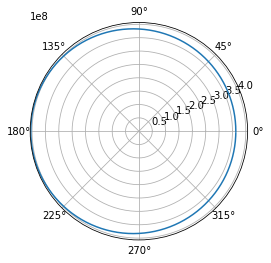

In [2]:
from math import cos, pi, fabs, sqrt, acos
def r(theta):
        return (362600000*(1+0.0549006))/(1+0.0549006*cos(theta))

step      = 1
theta     = [t * pi / 180 for t in range(0,360,step)]
rvalues = [fabs(r(t)) for t in theta]

import matplotlib.pyplot as plt

plt.polar(theta, rvalues)

plt.show()

Pour intégrer les équations du mouvement qui sont du second ordre, il faut transformer chaque équation du second en deux équation du premier. Afin d'utiliser l'olgorithme de Runge-Kutta, chaque équation sera intégrée une fois puis une seconde fois. Les équations en coordonnées cartésiennes deviennent:

\begin{aligned}
&\frac{\partial x}{\partial t} = v_{x}  \\                 
&\frac{\partial v_{x}}{\partial t} =  -\frac{GM_{T}m_{L}}{|\vec{r}|^3}x \\                
&\frac{\partial y}{\partial t} = v_{y}  \\               
&\frac{\partial v_{y}}{\partial t} =  -\frac{GM_{T}m_{L}}{|\vec{r}|^3}y  \\               
\end{aligned}

Et pour les équations en coordonnée polaires:
\begin{aligned}
&\frac{\partial r}{\partial t} = v_{r}  \\                 
&\frac{\partial v_{r}}{\partial t} =  r\dot{\theta}^2 - \frac{GM_T}{r^2} \\                
&\frac{\partial y}{\partial t} = v_{\theta}  \\               
&\frac{\partial v_{\theta}}{\partial t} = \frac{-2 \dot{r}\dot{\theta}}{r}   \\               
\end{aligned}


Pour des raisons de facilité, la trajectoire de la lune sera calculée en coordonnée polaire.

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt

def printSoln(X,Y,freq):
    def printHead(n):
        print("\n x ",end=" ")
        for i in range (n):
            print(" y[",i,"] ",end=" ")
        print()
    def printLine(x,y,n):
        print("{:13.4e}".format(x),end=" ")
        for i in range (n):
            print("{:13.4e}".format(y[i]),end=" ")
        print()
    m = len(Y)
    try: n = len(Y[0])
    except TypeError: n = 1
    if freq == 0: freq = m
    printHead(n)
    for i in range(0,m,freq):
        printLine(X[i],Y[i],n)
    if i != m - 1: printLine(X[m - 1],Y[m - 1],n)

def integrate(F,x,y,xStop,h):
    def Rk4(F,x,y,h):
        K0 = h*F(x,y)
        K1 = h*F(x+h/2.0, y+K0/2.0)
        K2 = h*F(x+h/2.0,y+K1/2.0)  
        K3 = h*F(x+h,y+K2)
        return (K0+2.0*K1+2.0*K2+K3)/6.0
    X= []
    Y= []
    X.append(x)
    Y.append(y)
    i=0
    while Y[i][2] < 2*np.pi :                                             #Y[i][2] < 2*pi     x < xStop
        y=y+Rk4(F,x,y,h)
        x=x+h
        X.append(x)
        Y.append(y)
        i=i+1
    return np.array(X),np.array(Y)

def F(x,y):
    F = np.zeros(4)
    F[0] = y[1]
    F[1] = y[0]*(y[3]**2) - 3.9860e14/(y[0]**2)
    F[2] = y[3]
    F[3] = -2.0*y[1]*y[3]/y[0]
    return F

x=0.0
xStop = 2419200.0
h=10
y = np.array([362600000.0, 0.0, 0.0, 0.00000298786])
freq=80000

X,Y =integrate(F,x,y,xStop,h)
printSoln(X,Y,freq)



 x   y[ 0 ]   y[ 1 ]   y[ 2 ]   y[ 3 ]  
   0.0000e+00    3.6260e+08    0.0000e+00    0.0000e+00    2.9879e-06 
   8.0000e+05    4.0313e+08    5.5758e+01    2.1954e+00    2.4172e-06 
   1.6000e+06    4.0391e+08   -5.4363e+01    4.0539e+00    2.4080e-06 
   2.4000e+06    3.6262e+08   -2.8879e+00    6.2412e+00    2.9875e-06 
   2.4141e+06    3.6260e+08    7.5071e-04    6.2832e+00    2.9879e-06 


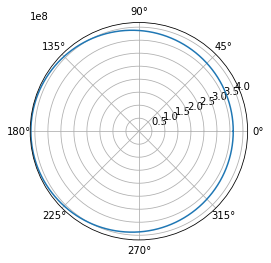

In [7]:
plt.polar(Y[:,2], Y[:,0])
plt.show()

!!!! Je préfère que tu commentes ça andrea !!!! (moyenne e)

In [4]:

moyenneE =  0.0
for i in range (len(X)):
    if (math.cos(Y[i][2])*Y[i][0]-362600000)!=0:
        moyenneE = moyenneE + (362600000-Y[i][0])/(math.cos(Y[i][2])*Y[i][0]-362600000)
moyenneE = moyenneE/len(X)
print(moyenneE)

NameError: name 'X' is not defined

Pour trouver le demi grand axe il suffit simplement de sommer la distance Terre-Lune au périgé et à l'apogé et de la divisé par 2.

In [8]:
def demigrandaxe(Rmax,rmin):
    return (Rmax+rmin)/2
print(demigrandaxe(max(Y[:,0]),min(Y[:,0])))                     

388948397.804


Le demi axe peut être calculé par la formule suivante:

\begin{equation}
b = \sqrt{a^2 - c^2} = \sqrt{a^2 - (a - r_{min})^2}                         
\end{equation}

où $a$ est le demi grand axe de l'élipse et $c$ la distance entre le foyer et le centre.

In [10]:
sqrt(388948397.80357337**2-(388948397.80357337-362600000.0)**2)

388054916.329057

Pour la durée de l'orbite, il suffit simplement de prendre la dernière valeur du tableau comptabilisant le temps.

In [12]:
X[i]

2414070.0

Ce qui convertie en seconde donne 27,94 jours ce qui est assez proche des 28 jours du cycle lunaire.